# Project overview

The bank wants to find out the spending pattern of the customers in order to adapt new strategic plans to retain and reward their customers.

In order to reward the customer or to retain them, they need to know all about their spending patterns. The spending patterns will help them understand to whom they should tailor their loans or the financial products(mutual funds, vehicle loans, Direct/Term deposit account)

# Sub-Problems

  1.Predict the average credit card consumption of each customer for the next 3 months based on the given data.

In [6]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_Dict = pd.read_excel('Data/Data_Dictionary.xlsx')
data_Dict

,Variable,Description
0,ID,Unique ID for every Customer
1,account_type,Account Type – current or saving
2,gender,Gender of customer
3,age,Age of customer
4,region_code,Code assigned to region of residence (has order)
5,cc_cons_apr,Credit card spend in April
6,dc_cons_apr,Debit card spend in April
7,cc_cons_may,Credit card spend in May
8,dc_cons_may,Debit card spend in May
9,cc_cons_jun,Credit card spend in June


In [283]:
pd.set_option('display.max_columns', None)
data1 = pd.read_csv('Data/Train.csv')
data1.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [284]:
data1['investment_4'].describe()

count    15000.000000
mean      3523.049025
std       7373.355434
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

In [285]:
#function for dropping columns
def drop_col(df,col_list):
    for col in col_list:
        if col in df.columns:
            df.drop(col, axis = 1, inplace=True)
    return df

In [286]:
not_req = ['ID','region_code',
           'personal_loan_active',
           'vehicle_loan_active',
           'personal_loan_closed',
           'vehicle_loan_closed',
           'loan_enq']

In [287]:
#removing unwanted columns 
data1 = drop_col(data1, not_req)

In [288]:
#encoding categorical data using one hot encoding
data2 = pd.get_dummies(data=data1, columns=['account_type', 'gender'])
data2.head(5)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,35,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0,1,0,0,1
1,35,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0,1,0,0,1
2,55,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0,1,0,0,1
3,29,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0,1,0,1,0
4,34,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0,1,0,0,1


In [289]:
cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']

In [290]:
numerical_data = data2.drop(cat_cols, axis=1)
numerical_data.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

In [291]:
#checking the number of rows for each variable that fall outside 3*IQR range
def get_outliers_count(dataframe):
    count = {}
    for col in dataframe.columns:
        sorted_col = sorted(dataframe[col])
        Q1,Q3 = np.percentile(sorted_col , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (3 * IQR)
        upper_range = Q3 + (3 * IQR)    
        outliers_df = dataframe[(dataframe[col] > upper_range) | (dataframe[col] < lower_range)]
        count[col] = outliers_df[col].count()
    return count

In [292]:
get_outliers_count(numerical_data)

{'age': 534,
 'cc_cons_apr': 478,
 'dc_cons_apr': 604,
 'cc_cons_may': 548,
 'dc_cons_may': 621,
 'cc_cons_jun': 546,
 'dc_cons_jun': 668,
 'cc_count_apr': 523,
 'cc_count_may': 73,
 'cc_count_jun': 49,
 'dc_count_apr': 0,
 'dc_count_may': 0,
 'dc_count_jun': 0,
 'card_lim': 0,
 'investment_1': 1831,
 'investment_2': 820,
 'investment_3': 751,
 'investment_4': 122,
 'debit_amount_apr': 589,
 'credit_amount_apr': 624,
 'debit_count_apr': 0,
 'credit_count_apr': 9,
 'max_credit_amount_apr': 719,
 'debit_amount_may': 593,
 'credit_amount_may': 473,
 'credit_count_may': 2060,
 'debit_count_may': 0,
 'max_credit_amount_may': 679,
 'debit_amount_jun': 510,
 'credit_amount_jun': 575,
 'credit_count_jun': 1026,
 'debit_count_jun': 0,
 'max_credit_amount_jun': 728,
 'emi_active': 881,
 'cc_cons': 3070}

### We cannot accept the outliers of age as those are wrong values. Hence, outliers of age are dropped manually from the dataset

In [293]:
#removes outliers which are not in 3*IQR range
def remove_outliers(dataframe, column):
    sorted_col = sorted(dataframe[column])
    Q1,Q3 = np.percentile(sorted_col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)  
    print(lower_range)
    print(upper_range)
    dataframe_out = dataframe[(dataframe[column] > lower_range) & (dataframe[column] < upper_range)]
    return dataframe_out

In [294]:
def treat_outliers(dataframe, col_list):
    for col in col_list:
        dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.05], inclusive=(True, True))
    return dataframe

In [295]:
data2.shape

(15000, 39)

In [296]:
data3 = remove_outliers(data2, 'age')
data3.shape

-27.0
113.0


(14466, 39)

In [297]:
data3['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [298]:
#updating numerical dataframe with age outliers removed
numerical_data = data3.drop(cat_cols, axis=1)
numerical_data['age'].describe()

count    14466.000000
mean        42.668879
std         12.196320
min         25.000000
25%         33.000000
50%         38.000000
75%         53.000000
max         69.000000
Name: age, dtype: float64

In [299]:
count_dict = get_outliers_count(numerical_data)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

,Column,Outliers count
0,age,0
1,cc_cons_apr,462
2,dc_cons_apr,592
3,cc_cons_may,539
4,dc_cons_may,595
5,cc_cons_jun,533
6,dc_cons_jun,638
7,cc_count_apr,501
8,cc_count_may,71
9,cc_count_jun,46


### Apart from age outliers, the outliers from other columns cannot be ignored. One reason is they are very high in number, and also they are just extreme cases..so removing them is not a good option. Hence we are treating them

In [300]:
numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']

In [301]:
data3.head()

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type_current,account_type_saving,gender_F,gender_M
0,35,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0,1,0,0,1
1,35,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0,1,0,0,1
2,55,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0,1,0,0,1
3,29,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0,1,0,1,0
4,34,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0,1,0,0,1


In [302]:
data3['investment_4'].describe()

count    14466.000000
mean      3519.800692
std       7386.243032
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

In [303]:
data3['investment_4'] = data3['investment_4'] - data3['investment_4'].min()

In [304]:
data3['investment_4'].describe()

count    14466.000000
mean     15698.800692
std       7386.243032
min          0.000000
25%      12179.000000
50%      14530.000000
75%      19064.000000
max      47525.000000
Name: investment_4, dtype: float64

In [305]:
X = data3.drop(['cc_cons'], axis=1) 
y = data3['cc_cons']  # Average Credit Card Spend in next 3 months Target
Y = np.log1p(y)

In [306]:
X.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type_current',
       'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [307]:
treated_df = treat_outliers(X, numerical_cols)

In [308]:
treated_df.shape

(14466, 38)

In [309]:
count_dict = get_outliers_count(treated_df)
outliers_count_df = pd.DataFrame(count_dict.items(), columns=['Column', 'Outliers count'])
outliers_count_df

,Column,Outliers count
0,age,0
1,cc_cons_apr,0
2,dc_cons_apr,0
3,cc_cons_may,0
4,dc_cons_may,0
5,cc_cons_jun,0
6,dc_cons_jun,0
7,cc_count_apr,0
8,cc_count_may,0
9,cc_count_jun,0


In [310]:
# y = np.log1p(y)

### Taking logarithm of cc_cons removes its skewness

In [311]:
#for other variables using standard scaler
def scale(dataframe, cols_list):
#     dataframe[cols_list] = np.log1p(dataframe[cols_list])
    scaler = StandardScaler()
    dataframe[cols_list] = scaler.fit_transform(dataframe[cols_list])
    return dataframe,scaler

In [312]:
scaled_df,scaler_train = scale(treated_df, numerical_cols) #scaler_train is the scaler fit on train data

In [313]:
scaler_train

StandardScaler()

In [314]:
scaled_df.columns

Index(['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type_current',
       'account_type_saving', 'gender_F', 'gender_M'],
      dtype='object')

In [315]:
X.head(3)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,-0.637918,0.559150,-0.877736,-0.265819,2.882137,0.539071,0.879776,-0.743672,-0.154183,-0.977065,1.704887,0.014532,0.627984,0.924845,-0.484028,-0.818027,-0.691505,0.526958,0.532332,-0.706579,-0.410728,-0.419764,-0.534053,-0.872439,1.872849,-0.622859,0.047669,-0.537706,-0.622736,-0.893250,-0.686829,0.614435,0.208845,-0.625996,1,0,0,1
1,-0.637918,0.186023,-0.797948,0.444273,-0.885198,-0.602635,-0.765399,-0.773301,-0.830149,-0.874108,-0.747446,0.441201,0.052912,-0.863833,-0.068486,-0.118067,1.105066,-0.283292,-0.903554,0.364800,-0.014245,2.024935,1.066650,0.679970,0.001693,-0.622859,1.184900,-0.553712,-0.407862,0.163754,0.063337,0.555497,-0.526993,0.577242,1,0,0,1
2,1.017886,-0.645496,-0.559397,-0.835008,-0.352863,1.263827,-0.097315,0.471110,0.059281,1.734159,-0.692950,-0.777853,1.814072,-0.435147,-0.161461,1.098610,-0.196266,0.052995,-0.475944,0.300462,1.319382,-0.175294,-0.153895,-0.722185,-0.001161,-0.622859,1.304608,-0.897159,-0.118445,0.148377,-0.489417,-1.242095,-0.425453,1.882364,1,0,0,1


In [316]:
scaled_df.head(3)

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,-0.637918,0.559150,-0.877736,-0.265819,2.882137,0.539071,0.879776,-0.743672,-0.154183,-0.977065,1.704887,0.014532,0.627984,0.924845,-0.484028,-0.818027,-0.691505,0.526958,0.532332,-0.706579,-0.410728,-0.419764,-0.534053,-0.872439,1.872849,-0.622859,0.047669,-0.537706,-0.622736,-0.893250,-0.686829,0.614435,0.208845,-0.625996,1,0,0,1
1,-0.637918,0.186023,-0.797948,0.444273,-0.885198,-0.602635,-0.765399,-0.773301,-0.830149,-0.874108,-0.747446,0.441201,0.052912,-0.863833,-0.068486,-0.118067,1.105066,-0.283292,-0.903554,0.364800,-0.014245,2.024935,1.066650,0.679970,0.001693,-0.622859,1.184900,-0.553712,-0.407862,0.163754,0.063337,0.555497,-0.526993,0.577242,1,0,0,1
2,1.017886,-0.645496,-0.559397,-0.835008,-0.352863,1.263827,-0.097315,0.471110,0.059281,1.734159,-0.692950,-0.777853,1.814072,-0.435147,-0.161461,1.098610,-0.196266,0.052995,-0.475944,0.300462,1.319382,-0.175294,-0.153895,-0.722185,-0.001161,-0.622859,1.304608,-0.897159,-0.118445,0.148377,-0.489417,-1.242095,-0.425453,1.882364,1,0,0,1


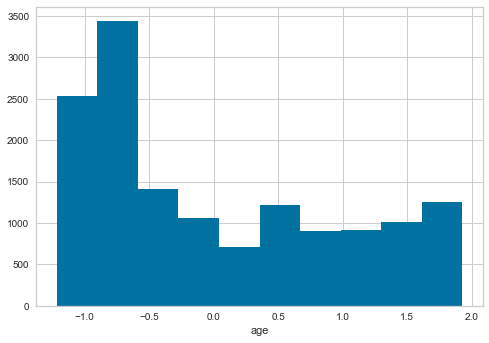

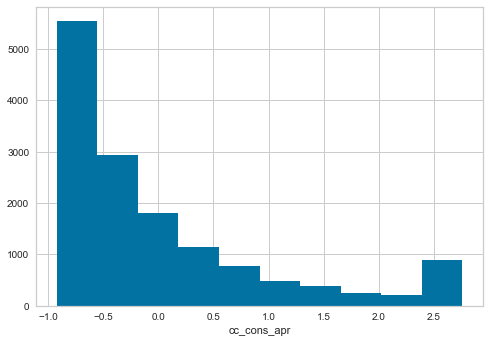

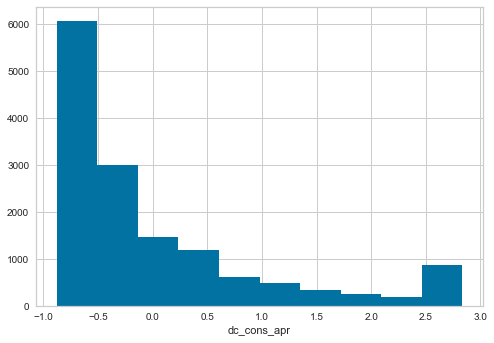

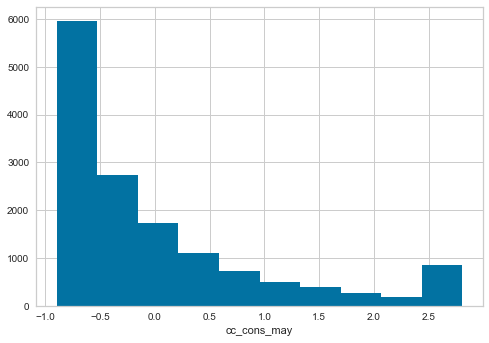

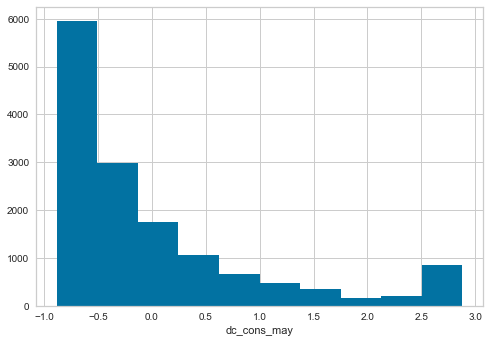

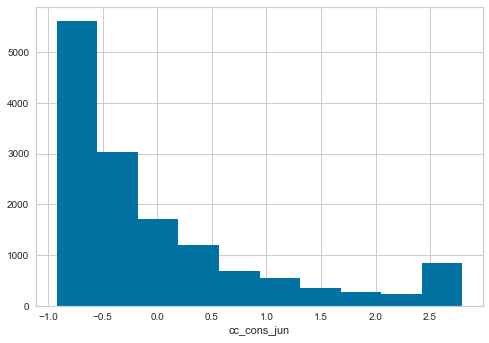

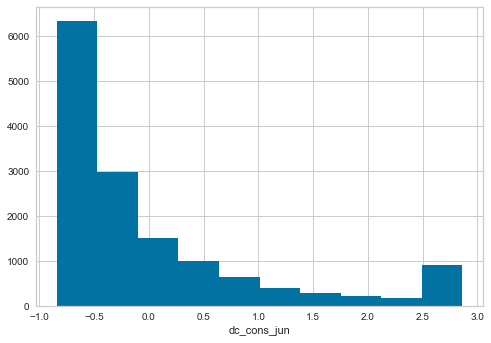

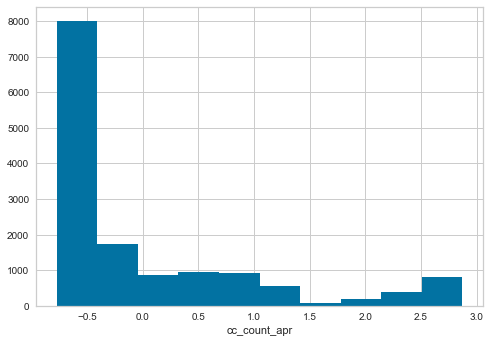

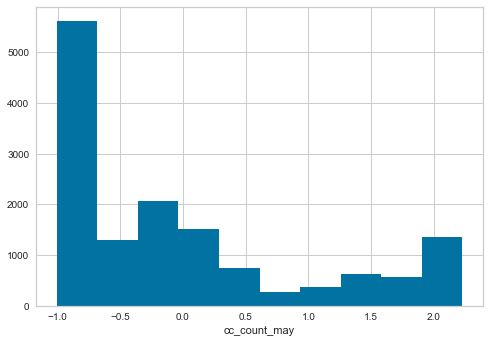

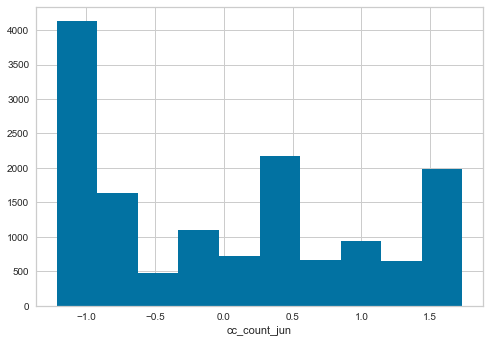

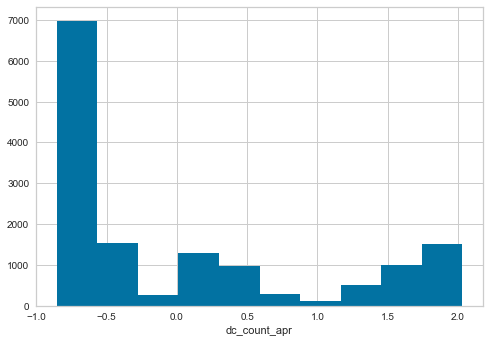

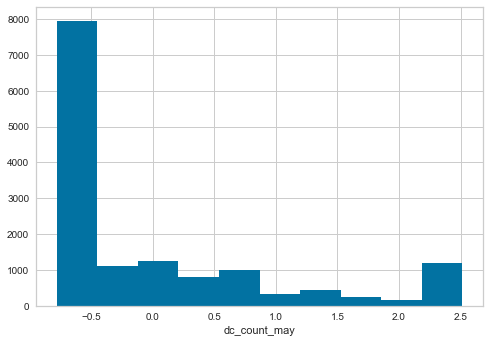

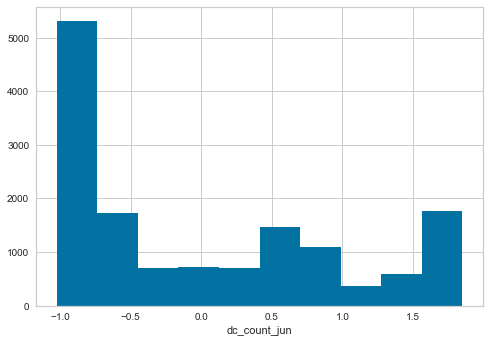

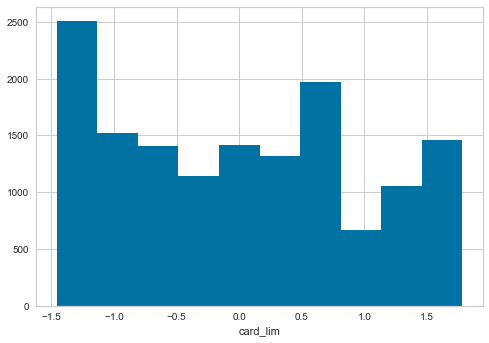

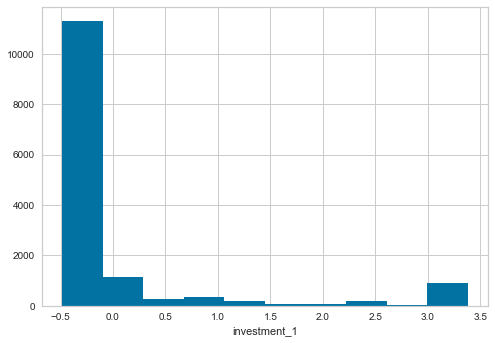

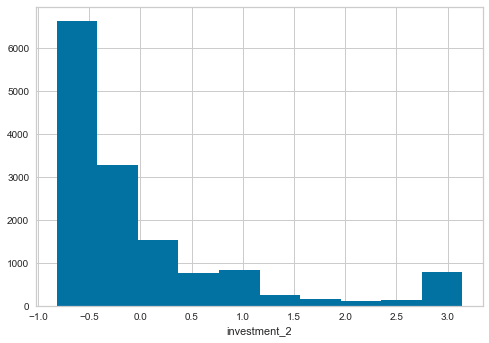

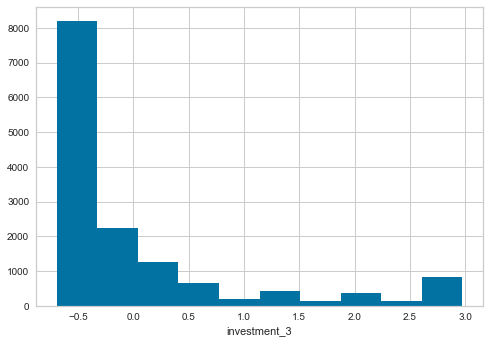

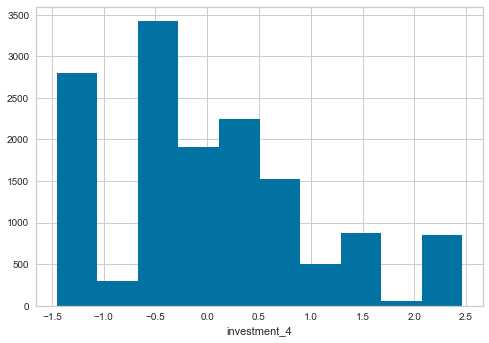

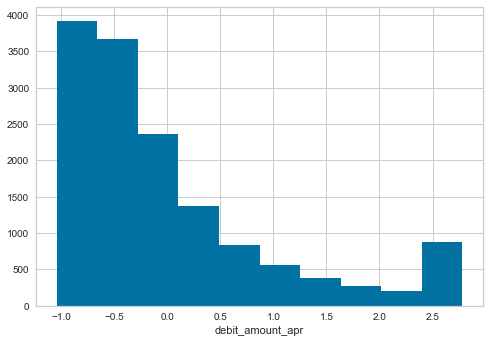

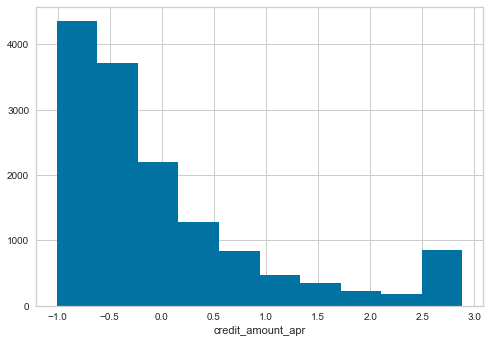

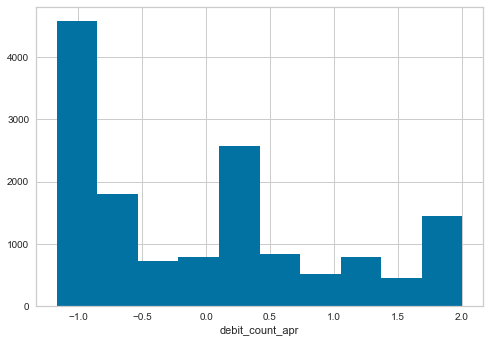

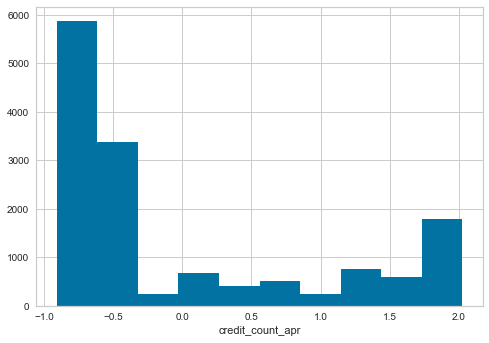

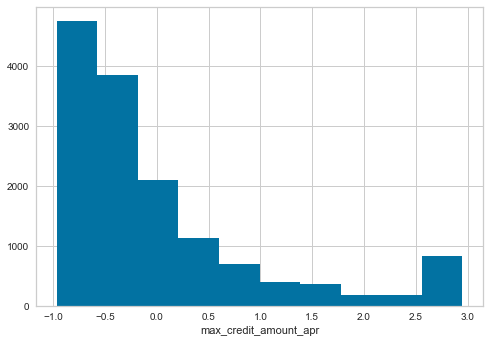

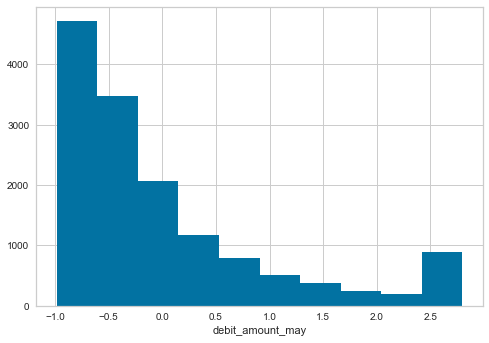

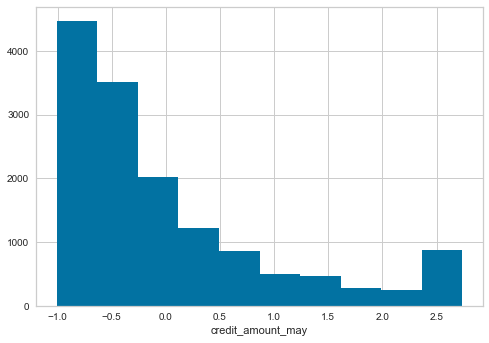

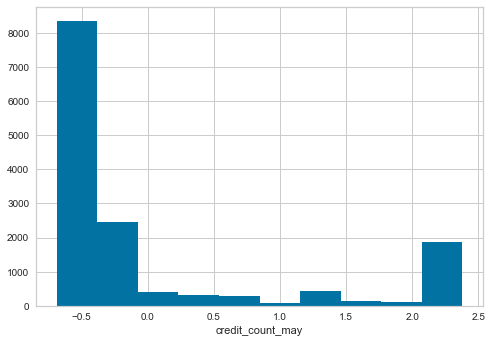

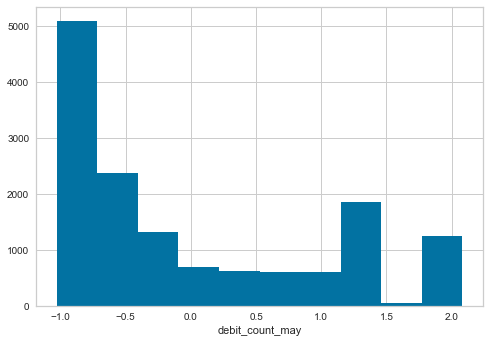

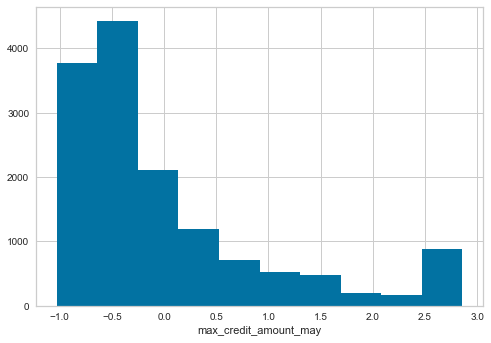

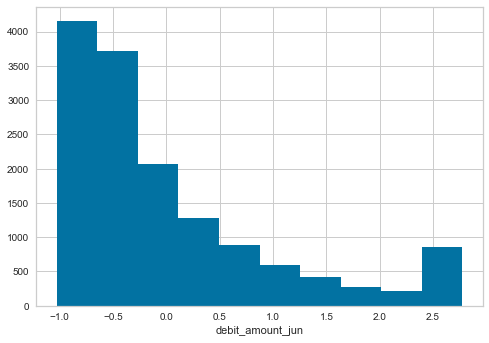

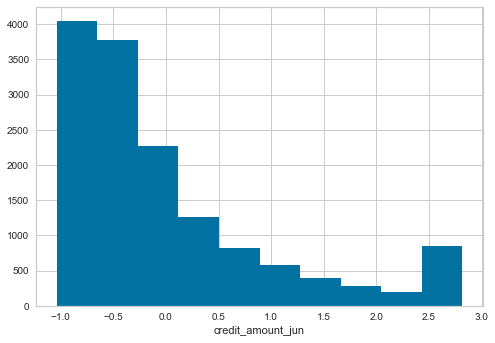

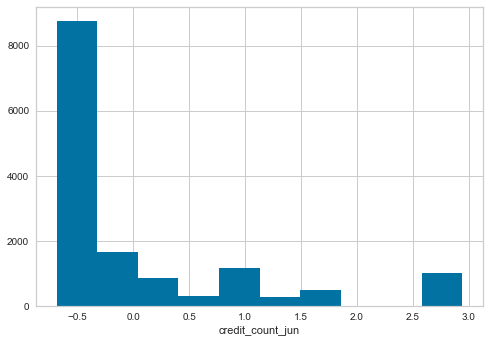

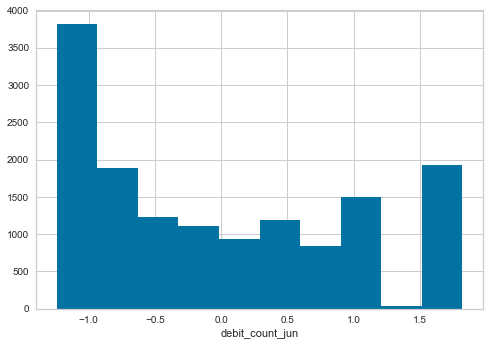

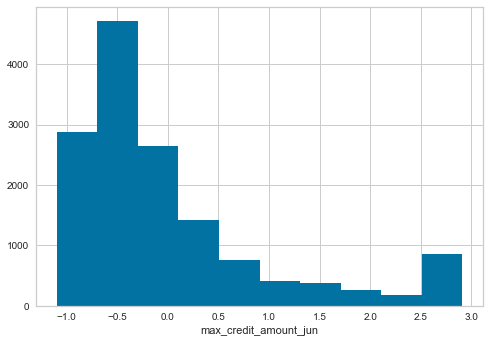

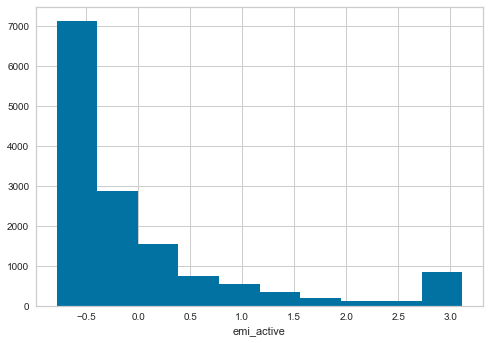

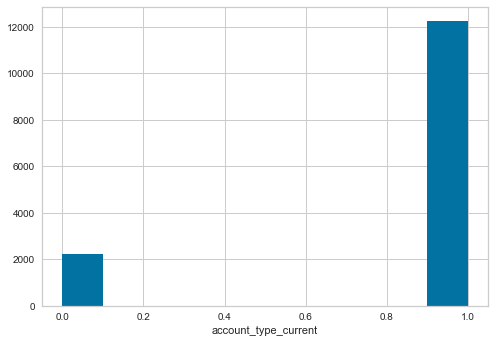

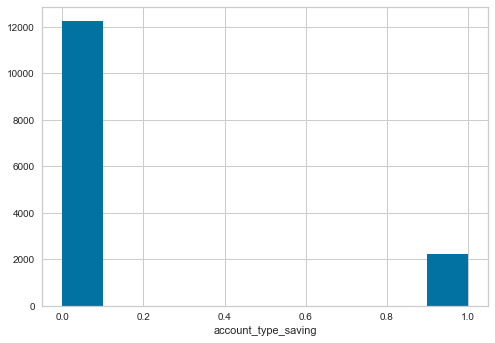

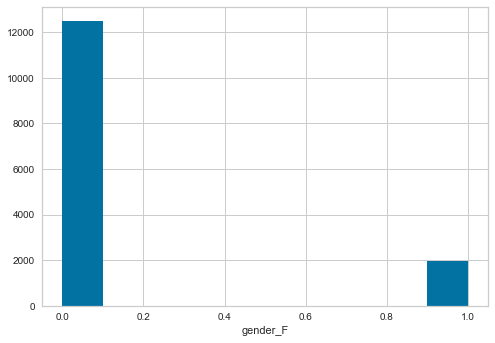

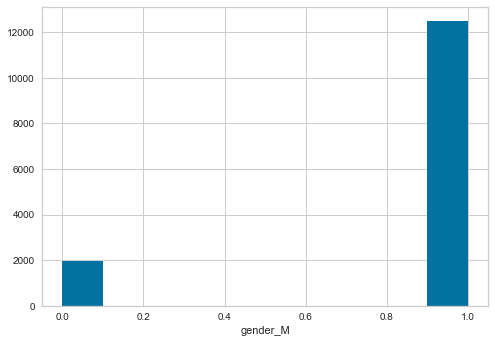

In [317]:
for col in scaled_df.columns:
    plt.figure()
    plt.hist(scaled_df[col])
    plt.xlabel(col)

In [58]:
### Load test Data and Preprocess 

In [318]:
test_data = pd.read_csv('Data\Test.csv')

In [319]:
test_data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,1.0,1.0,1.0,1.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,1.0,1.0,1.0,1.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,1.0,1.0,1.0,1.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,1.0,1.0,1.0,1.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,1.0,1.0,1.0,1.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [320]:
test_data['investment_4'].describe()

count     5000.000000
mean      3412.612652
std       7358.082231
min     -12179.000000
25%          0.000000
50%       2351.000000
75%       6885.000000
max      35346.000000
Name: investment_4, dtype: float64

In [321]:
(test_data[test_data['investment_4']<1]['investment_4']-test_data['investment_4'].min()).value_counts()

12179.00000    323
6180.56006     164
7500.00000     137
6740.00000     103
7515.00000      99
5878.00000      95
6237.00000      91
5294.00000      78
8672.82007      73
6463.50977      69
0.00000         52
5897.62012      49
7855.00000      29
8554.00000      16
5844.00000      15
7566.99023      12
11777.00000      7
7537.22021       5
4527.00000       5
9126.00000       4
9360.00000       3
3936.00000       2
Name: investment_4, dtype: int64

In [212]:
# np.log1p(test_data[numerical_cols])

In [213]:
# np.log1p(x) : This mathematical function helps user to calculate natural logarithmic value of x+1 
# where x belongs to all the input array elements. 

#log1p is reverse of exp(x) – 1 (np.expm1())

# np.expm1(x) : This mathematical function helps user to calculate exponential value of x -1  

In [214]:
# Python program explaining
# log1p() function
import numpy as np

in_array = [1, 3, 5]
print ("Input array : ", in_array)

out_array1 = np.log(in_array)
print ("Output array np.log(): ", out_array1)

out_array2 = np.log1p(in_array)
print ("Output array np.log1p(): ", out_array2)

out_array3 = np.exp(out_array1)
print ("Output array : ", out_array3)

out_array4 = np.expm1(out_array2)
print ("Output array : ", out_array4)

Input array :  [1, 3, 5]
Output array np.log():  [0.         1.09861229 1.60943791]
Output array np.log1p():  [0.69314718 1.38629436 1.79175947]
Output array :  [1. 3. 5.]
Output array :  [1. 3. 5.]


In [322]:
def custom_pipeline(dataframe, scaler):
    #dropping unnecessary columns
    not_req = ['ID','region_code','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']
    dataframe = dataframe.drop(not_req, axis=1)
    
    #one hot encoding on categorical data
    dataframe = pd.get_dummies(data=dataframe, columns=['account_type', 'gender'])
    
    #list of numerical and categorical columns
    numerical_cols = ['age', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active']
    cat_cols = ['account_type_current','account_type_saving','gender_F','gender_M']
    
    #scaling on test data using same scaler used to fit on train data
    dataframe['investment_4'] = dataframe['investment_4'] - dataframe['investment_4'].min()
    dataframe[numerical_cols] = np.log1p(dataframe[numerical_cols])
    dataframe[numerical_cols] = scaler.transform(dataframe[numerical_cols])
    return dataframe

In [324]:
#assessing linear model on this data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test)))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score: 0.002221431526881479
Test score: 0.0018707971347174945
70689.961248429
9819136338.419565
99091.5553335377


In [323]:
#assessing linear model on this data
X_train, X_test, y_train, y_test1 = train_test_split(X, Y, test_size=0.33, random_state=12)
linear_model1 = LinearRegression()
linear_model1.fit(X, y)
y_pred1 = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test1)))
print(metrics.mean_absolute_error(y_test1, y_pred1))
print(metrics.mean_squared_error(y_test1, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Training score: 0.0015861034147816033
Test score: 0.0012361360969627144
1.1643310130536586
2.625408431865193
1.6203112145094822


In [325]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [326]:
print(rmsle(y_test, y_pred))

2.0574346171599616


In [327]:
print(rmsle(y_test1, y_pred1))

0.15842986504756176


In [328]:
resid = y_test - y_pred

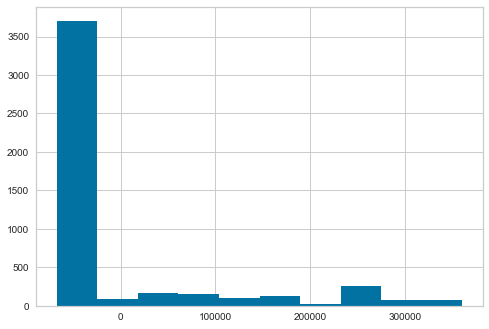

In [329]:
plt.hist(resid)
plt.show()


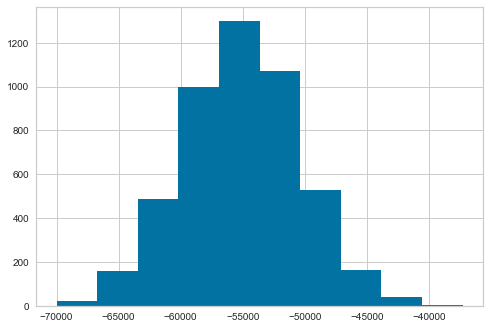

In [230]:
r = y_test1-y_pred1
plt.hist(r)
plt.show()

### Linear regression residuals plot is not normal. This might be due to the non-linear relationship with the outcome variable.

In [330]:
X_train, X_test, y_train, y_test1 = train_test_split(X, Y, test_size=0.33, random_state=12)

In [331]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Training score: "+str(dt_model.score(X_train, y_train)))
print("Test score: "+str(dt_model.score(X_test, y_test)))

Training score: 1.0
Test score: -0.3186173868447504


In [332]:
print(metrics.mean_absolute_error(y_test, y_pred_dt))
print(metrics.mean_squared_error(y_test, y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

55985.79782951005
12971951789.879337
113894.47655562291


In [347]:
pred = np.expm1(y_pred_dt)
print(rmsle(y_test, pred))

2.388717725773472


In [348]:
resid = y_test - pred

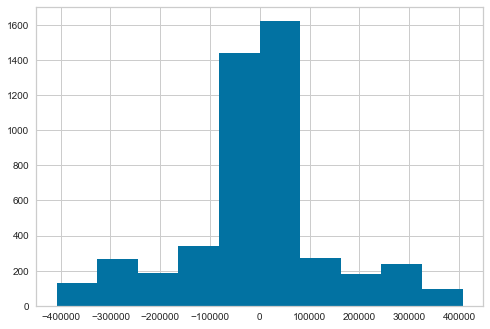

In [349]:
plt.hist(resid)
plt.show()

### Decision tree regressor gave a bit high rmsle but the residuals plot was normal. This might be due to decision tree regressor was able to catch non-normal relationship with the output variable.

In [339]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Training score: "+str(rf_model.score(X_train, y_train)))
print("Test score: "+str(rf_model.score(X_test, y_test)))

Training score: 0.8581741249886926
Test score: -0.3186176634765645


In [340]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

55985.83838799325
12971954511.25598
113894.48850254335


In [344]:
# print(rmsle(y_test, y_pred_rf))
pred = np.expm1(y_pred_rf)
print(rmsle(y_test, pred))

1.637636373119614


In [345]:
resid = y_test - pred

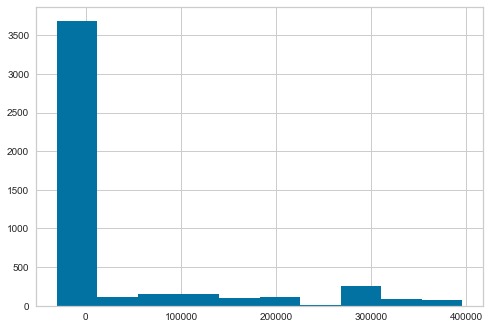

In [346]:
plt.hist(resid)
plt.show()

### Random forest regressor gives best result as rmsle

In [350]:
test_data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,575,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10.0,4.0,47.0,56.0,6.0,125000.0,1.0,1.0,1.0,1.0,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36.0,24485.0,23512.67,41755.0,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,Y,1170.49
1,13541,current,M,33,394,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10.0,4.0,50.0,38.0,31.0,59000.0,1.0,1.0,1.0,1.0,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5.0,3375.0,15049.44,130299.0,43.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,Y,16447.45
2,13431,current,M,53,324,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30.0,5.0,24.0,27.0,2.0,49999.0,1.0,1.0,1.0,1.0,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6.0,14950.0,133659.00,40422.0,42.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,Y,2622.28
3,8687,current,M,33,370,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99.0,71.0,5.0,1.0,11.0,520000.0,1.0,1.0,1.0,1.0,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1.0,235844.0,99686.03,48148.0,3.0,5.0,97825.0,93572.42,109429.75,21.0,0.0,72317.00,Y,340.79
4,14727,current,M,62,505,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10.0,47.0,5.0,25.0,1.0,152000.0,1.0,1.0,1.0,1.0,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1.0,14495.0,190374.25,25926.0,70.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,Y,2812.20


In [351]:
test_scaled = custom_pipeline(test_data, scaler_train)

In [352]:
test_data.columns

Index(['ID', 'account_type', 'gender', 'age', 'region_code', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [353]:
y_pred_rf = rf_model.predict(test_scaled)

In [354]:
y_pred_rf

array([9.62290418, 9.57348343, 9.45829911, ..., 9.49072033, 9.38089064,
       9.43762404])

In [357]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': np.expm1(y_pred_rf)} )

In [358]:
to_submit.head()

,ID,cc_cons
0,17591,15105.859318
1,13541,14377.415454
2,13431,12813.070632
3,8687,10214.980532
4,14727,15586.451679


In [226]:
# to_submit.to_csv('second_submission.csv', index=False)

### All above data was modeled with transformation. The above random forest model gave an RMSLE score of 1.63 on test data

### We decided to add a constant to investment_4 so that negative values are removed and applying log transformation is possible

In [363]:
X = data2.drop(['cc_cons'], axis=1) 
y = np.log1p(data2['cc_cons'])

In [366]:
treated_df = treat_outliers(X, numerical_cols)

In [367]:
treated_df['investment_4'].describe()

count    15000.000000
mean      3386.948053
std       6639.003110
min      -6281.379880
25%          0.000000
50%       2351.000000
75%       6885.000000
max      19765.000000
Name: investment_4, dtype: float64

In [368]:
treated_df['investment_4'] = treated_df['investment_4']-treated_df['investment_4'].min()

In [369]:
treated_df['investment_4'].describe()

count    15000.000000
mean      9668.327933
std       6639.003110
min          0.000000
25%       6281.379880
50%       8632.379880
75%      13166.379880
max      26046.379880
Name: investment_4, dtype: float64

In [370]:
#taking log transformation to remove skewness
treated_df[numerical_cols] = np.log1p(treated_df[numerical_cols])

In [371]:
treated_df.head()

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,3.583519,10.122382,5.937536,9.238831,10.146826,9.698454,9.344259,1.098612,3.295837,2.397895,3.891820,2.708050,3.871201,12.971543,6.387216,7.397629,6.669498,9.485498,11.361177,10.134321,3.218876,1.945910,10.138441,9.352578,12.164094,1.098612,3.713572,10.109037,10.310695,9.454227,1.098612,4.189655,10.836380,7.423622,1,0,0,1
1,3.583519,9.849170,6.874198,9.936584,6.021023,8.347116,6.786717,0.693147,2.079442,2.639057,1.386294,3.091042,3.465736,11.755879,12.271664,12.059193,11.413392,8.959617,9.413832,11.392952,3.583519,3.610918,11.299126,11.432556,11.172728,1.098612,4.369448,10.083682,10.648279,11.241209,3.091042,4.158883,10.053071,9.476110,1,0,0,1
2,4.025352,8.644684,7.910224,7.583502,8.277440,10.084026,8.550435,3.784190,3.496508,4.499810,1.609438,0.693147,4.394449,12.206073,12.019192,13.060490,10.147414,9.212077,10.439805,11.349006,4.290459,2.302585,10.557556,9.870138,11.170139,1.098612,4.418841,9.282940,10.974630,11.229023,2.079442,1.098612,10.204962,10.141570,1,0,0,1
3,3.401197,10.325170,7.120444,9.442315,9.120322,9.771213,9.521590,3.988984,1.098612,3.931826,0.693147,0.693147,2.397895,11.951187,11.312932,12.316631,10.789340,7.379869,9.355240,12.372972,3.784190,3.433987,10.872997,10.688961,11.051443,3.178054,3.663562,9.442087,11.154141,11.137635,3.091042,4.430817,10.669839,8.173387,1,0,1,0
4,3.555348,8.914949,8.840296,8.381373,7.570443,7.660114,8.829106,4.219508,3.871201,4.418841,4.007333,2.833213,4.234107,12.601491,6.345285,12.861001,12.122691,9.487849,9.742368,10.983563,3.850148,3.610918,9.883999,11.939857,10.318474,3.218876,3.931826,10.135155,9.217515,11.291543,2.197225,3.496508,10.374896,9.455749,1,0,0,1


In [372]:
scaled_df,scaler_train = scale(treated_df, numerical_cols)

In [373]:
scaled_df.head()

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,-0.627754,0.886938,-1.930975,0.202100,1.749876,0.881675,1.105271,-1.284830,0.310383,-0.823397,1.389314,0.562647,0.847053,0.845673,-1.608190,-2.527963,-1.453528,0.477771,0.820324,-0.692291,0.008288,-0.001455,-0.428492,-1.289869,1.462312,-0.777005,0.472196,-0.351837,-0.453581,-1.228801,-1.242310,0.767816,0.561359,-0.545951,1,0,0,1
1,-0.627754,0.633492,-1.141069,0.834506,-1.937596,-0.392320,-1.108288,-1.621500,-0.840533,-0.591689,-0.707401,0.910018,0.531518,-0.526178,0.779855,0.439933,1.182603,0.243927,-1.258286,0.724849,0.387719,1.541443,1.245208,0.947783,0.431699,-0.777005,1.155283,-0.382768,-0.074495,0.563939,0.647339,0.737690,-0.229221,0.955852,1,0,0,1
2,0.967774,-0.483851,-0.267369,-1.298199,0.079096,1.245179,0.418214,0.945085,0.500251,1.196119,-0.520666,-1.264853,1.254248,-0.018144,0.677396,1.077432,0.479113,0.356189,-0.163155,0.675368,1.123328,0.329061,0.175869,-0.733075,0.429008,-0.777005,1.206724,-1.359590,0.291977,0.551714,-0.312078,-2.258309,-0.075920,1.442769,1,0,0,1
3,-1.286147,1.075055,-0.933405,0.386528,0.832429,0.950269,1.258752,1.115132,-1.768563,0.650401,-1.287451,-1.264853,-0.299481,-0.305777,0.390779,0.603837,0.835824,-0.458543,-1.320828,1.828291,0.596527,1.377488,0.630733,0.147819,0.305612,1.216642,0.420111,-1.165447,0.493557,0.460032,0.647339,1.003913,0.393272,0.002651,1,0,1,0
4,-0.729484,-0.233139,0.516980,-0.575052,-0.552789,-1.040002,0.659405,1.306542,0.854775,1.118324,1.485980,0.676169,1.129468,0.428077,-1.625207,0.950423,1.576753,0.478817,-0.907604,0.263902,0.665160,1.541443,-0.795396,1.493539,-0.456374,1.255780,0.699505,-0.319977,-1.681154,0.614435,-0.200371,0.089226,0.095592,0.940955,1,0,0,1


In [374]:
test_data = pd.read_csv('Data\Test.csv')
# test_data['total_investment'] = test_data['investment_1']+test_data['investment_2']+test_data['investment_3']+test_data['investment_4']

In [375]:
#assessing linear model on this data
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.33, random_state=42)
linear_model = LinearRegression()
linear_model.fit(scaled_df, y)
y_pred = linear_model.predict(X_test)
print("Training score: "+str(linear_model.score(X_train, y_train)))
print("Test score: "+str(linear_model.score(X_test, y_test)))

Training score: 0.0020489945064920967
Test score: 0.0035476021395578483


In [376]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.1533142123497475
2.600610851154242
1.6126409554374594


In [377]:
print(rmsle(y_test, y_pred))

0.16078136926323786


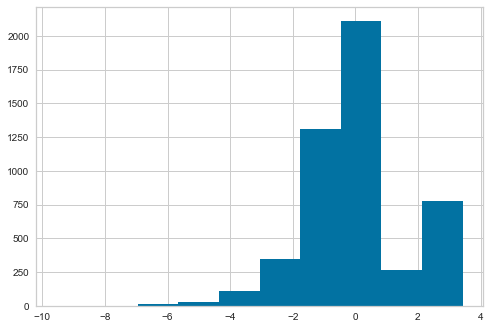

In [380]:
resid = y_test - y_pred
plt.hist(resid)
plt.show()

In [381]:
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Training score: "+str(dt_model.score(X_train, y_train)))
print("Test score: "+str(dt_model.score(X_test, y_test)))

Training score: 1.0
Test score: -1.1201944346763284


In [382]:
print(metrics.mean_absolute_error(y_test, y_pred_dt))
print(metrics.mean_squared_error(y_test, y_pred_dt))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

1.795079151081974
5.533431065262313
2.3523246088204566


In [383]:
print(rmsle(y_test, y_pred_dt))

0.23571748595041792


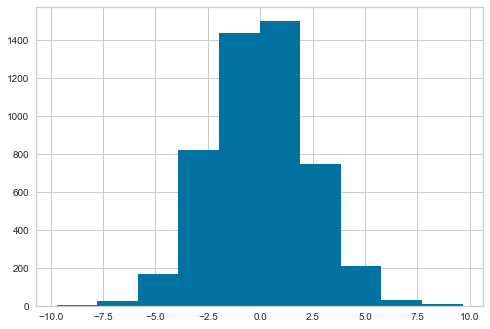

In [384]:
resid = y_test - y_pred_dt
plt.hist(resid)
plt.show()

In [385]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Training score: "+str(rf_model.score(X_train, y_train)))
print("Test score: "+str(rf_model.score(X_test, y_test)))

Training score: 0.8556953827861731
Test score: -0.01599973962050072


In [386]:
print(metrics.mean_absolute_error(y_test, y_pred_rf))
print(metrics.mean_squared_error(y_test, y_pred_rf))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

1.1776556852942532
2.6516268647657104
1.6283816704832164


In [387]:
print(rmsle(y_test, y_pred_rf))

0.16229383420680898


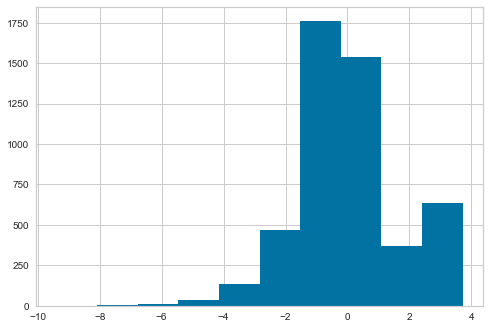

In [388]:
resid = y_test - y_pred_rf
plt.hist(resid)
plt.show()

In [392]:
test_scaled = custom_pipeline(test_data, scaler_train)

In [393]:
test_scaled.head()

,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_current,account_type_saving,gender_F,gender_M
0,-0.432509,-1.141164,-0.897372,-0.265498,-1.493053,0.337452,1.367558,-0.860677,-0.539222,-1.580945,1.372059,1.773483,-0.651218,-0.548524,-3.106728,0.936379,-1.048270,0.161425,-0.389982,-0.055724,-0.393015,1.541443,-0.475478,-0.523079,-0.122537,1.255780,-0.224610,-1.478914,-0.435913,-0.329662,-0.969468,-0.822768,-0.117456,-0.807599,1,0,0,1
1,-0.834163,1.041463,-0.695069,-1.445321,-0.338759,0.506929,-1.041570,-1.045959,-0.539222,-1.580945,1.422792,1.429289,0.531518,-1.395750,0.479548,1.077432,-1.384640,1.048523,-0.225690,-0.847598,0.572606,-0.144301,-3.332659,-1.003076,1.060511,1.797769,0.472196,-0.803141,-1.284128,-0.966051,-0.438721,0.277558,-0.877837,1.125516,1,0,0,1
2,0.836445,-0.435123,0.424547,-1.011407,-1.382158,-2.062939,0.224878,-0.470419,0.441097,-1.405771,0.826170,1.128750,-1.310590,-1.582549,0.217161,1.307227,0.896554,0.527850,0.491998,-0.271235,0.548121,-0.001455,-1.186847,1.346367,-0.156265,1.775728,0.336748,0.127898,-0.365511,-0.259404,-0.584919,-1.079622,-0.798343,-0.217741,1,0,0,1
3,-0.834163,-1.403799,1.335261,1.305597,-2.739351,-0.382698,1.597297,-1.621500,1.549234,0.981723,-0.368093,-1.264853,-0.231768,1.060133,-0.499913,1.077432,-0.334244,0.607906,-0.010701,-0.085770,0.665160,-1.162343,2.790743,1.030872,0.025560,-0.501192,-1.529347,1.333946,0.821859,0.926944,0.647339,-3.333848,0.917079,-1.708932,1,0,0,1
4,1.393108,-0.996043,-0.048376,-0.868015,-0.257089,-0.602670,0.410139,-1.284830,-0.539222,0.592153,-0.368093,1.061535,-1.626125,-0.327833,2.442606,-4.291744,1.383710,0.489260,-1.595336,-1.258753,-0.755446,-1.162343,-1.231413,1.726877,-0.617961,2.256518,1.114962,-0.194873,-0.967710,-0.048151,-0.438721,0.174410,0.376888,-0.166597,1,0,0,1


In [394]:
y_pred_rf = rf_model.predict(test_scaled)

In [395]:
y_pred_rf

array([9.56716455, 9.47001121, 9.79590232, ..., 9.85091798, 9.79682159,
       9.92790114])

In [396]:
np.expm1(y_pred_rf)

array([14286.84641798, 12964.03256026, 17958.99961081, ...,
       18974.76612787, 17975.51722777, 20493.28079886])

In [397]:
to_submit = pd.DataFrame({'ID': test_data['ID'], 'cc_cons': np.expm1(y_pred_rf)} )

In [398]:
# to_submit.to_csv('transf_applied.csv', index=False)

In [399]:
to_submit.head()

,ID,cc_cons
0,17591,14286.846418
1,13541,12964.032560
2,13431,17958.999611
3,8687,18868.870937
4,14727,18431.595154
